In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import itertools

plt.rcParams['figure.figsize'] = [10, 7]

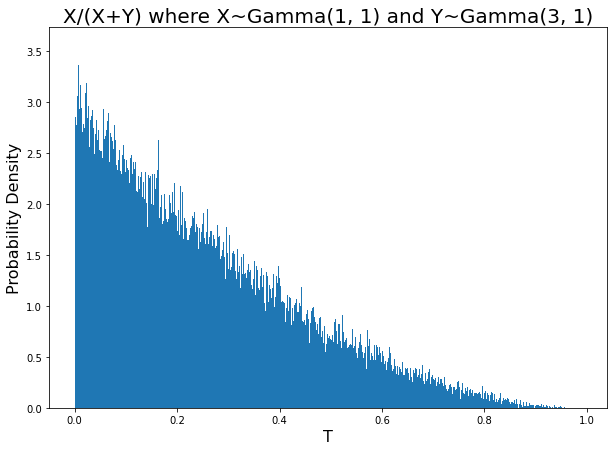

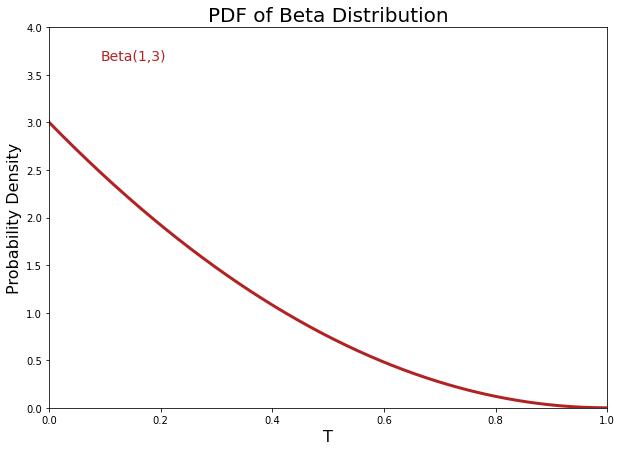

In [2]:
# Comparison of the graph of beta(alpha_, beta_) and the histogram of a sum/division of gamma(alpha_, lambda_) and
# beta(beta_, lambda_) random variables
def histogram_beta(alpha_=1, beta_=3, lambda_=1):
	# x and y are vectors of 1000000 i.i.d. Gamma(alpha_,lambda_) r.v.
	x = np.random.gamma(alpha_, 1/lambda_, 1000000)
	y = np.random.gamma(beta_, 1/lambda_, 1000000)
	# r.v. of interest
	v = x/(x + y)
	# produces histogram
	plt.title(f"X/(X+Y) where X~Gamma({alpha_}, {lambda_}) and Y~Gamma({beta_}, {lambda_})", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Probability Density", fontsize=16)
	plt.hist(v, bins=10000, density=True)

	# prints histogram
	plt.show()


def beta(alpha_=1, beta_=3):
	x = np.linspace(0, 1, 10000)
	y = sp.stats.beta.pdf(x, alpha_, beta_)

	plt.title("PDF of Beta Distribution", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Probability Density", fontsize=16)
	plt.plot(x, y, linewidth=3, color='firebrick')
	plt.annotate(f"Beta({alpha_},{beta_})", xy=(0.15, 3.7), size=14, ha='center', va='center', color='firebrick')
	plt.ylim([0, 4])
	plt.xlim([0, 1])
	plt.show()


histogram_beta(1, 3, 1)
beta(1, 3)

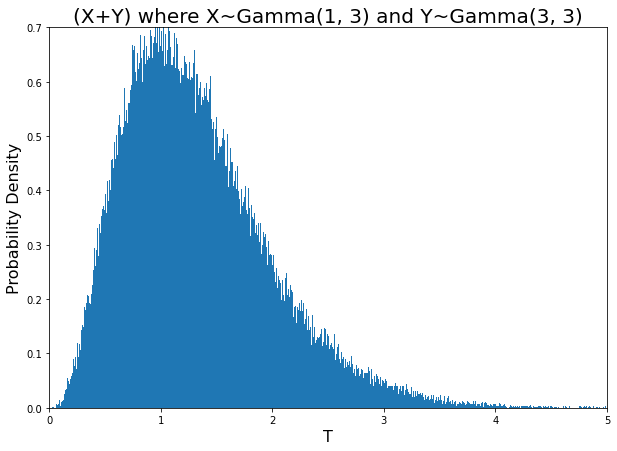

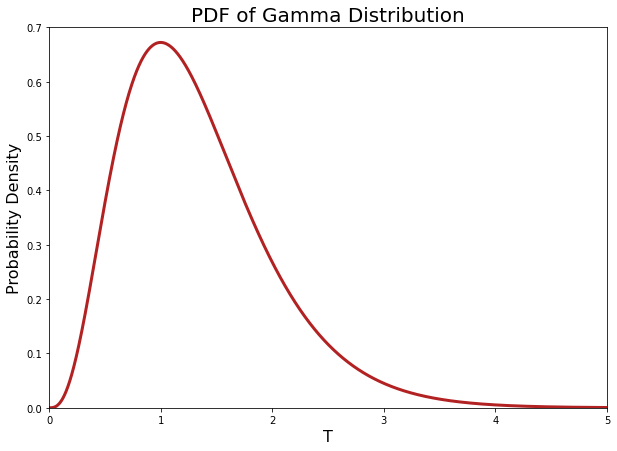

In [6]:
def histogram_gamma_sum(alpha_=4, beta_=5, lambda_=3):
	# x and y are vectors of 1000000 i.i.d. Gamma(alpha_,lambda_) r.v.
	x = np.random.gamma(alpha_, 1/lambda_, 1000000)
	y = np.random.gamma(beta_, 1/lambda_, 1000000)
	# r.v. of interest
	u = x + y
	# produces histogram
	plt.title(f"(X+Y) where X~Gamma({alpha_}, {lambda_}) and Y~Gamma({beta_}, {lambda_})", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Probability Density", fontsize=16)
	plt.hist(u, bins=10000, density=True)
	plt.ylim([0, 0.7])
	plt.xlim([0, 5])
	# prints histogram
	plt.show()


def gamma(alpha_=4, beta_=5, lambda_=3):
	x = np.linspace(0, 60, 1000000)
	y = sp.stats.gamma.pdf(x, (alpha_+beta_), scale=1/lambda_)

	plt.title("PDF of Gamma Distribution", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Probability Density", fontsize=16)
	plt.plot(x, y, linewidth=3, color='firebrick')
	plt.annotate(f"Gamma({alpha_}+{beta_},{lambda_})", xy=(0.15, 3.7), size=14, ha='center', va='center', color='firebrick')
	plt.ylim([0, 0.7])
	plt.xlim([0, 5])
	plt.show()

histogram_gamma_sum(1, 3, 3)
gamma(1, 3, 3)

In [ ]:
def gamma_distribution_smallF(alpha_=4, lambda_=3):
	# vector of values for x: x=(0.00,0.01,0.02,0.03, ... ,5.00)
	x = np.linspace(0, 25, 10000)
	# vector of the corresponding values of f(x) if X ~ Gamma(alpha_,lambda_)
	fx = (((1/lambda_)**alpha_)/math.gamma(alpha_)) * (x**(1/lambda_)) * np.exp(-(1/lambda_)*x)
	# graph of f(x) as a function of x
	plt.plot(x, fx)
	plt.show()

def gamma_distribution_bigF(alpha_=4, lambda_=3):
	# vector of values for x: x=(0.00,0.01,0.02,0.03, ... ,5.00)
	x = np.linspace(0, 25, 10000)
	# vector of the corresponding values of f(x) if X ~ Gamma(alpha_,lambda_)
	fx = (((1/lambda_)**alpha_)/math.gamma(alpha_)) * (x**(1/lambda_)) * np.exp(-(1/lambda_)*x)
	# value of Delta x: same as gap between values in vector x
	dx = 0.01
	# vector of values of [f(x) Delta(x)]
	fxdx = fx * dx
	# vector of cumulative values of [f(x) Delta(x)]
	Fx = np.array(list(itertools.accumulate(fxdx)))
	# graph of F(x) as a function of x
	plt.plot(x, Fx)
	plt.show()


gamma_distribution_smallF(4, 3)
gamma_distribution_bigF(4, 3)

In [ ]:
def plot_gamma_k(alpha_1=1, alpha_2=5, alpha_3=10 ):
	# alpha_ : the number of events for which you are waiting to occur.

	x = np.linspace(0, 50, 1000)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_1, moments='mvsk')
	y1 = sp.stats.gamma.pdf(x, alpha_1)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_2, moments='mvsk')
	y2 = sp.stats.gamma.pdf(x, alpha_2)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_3, moments='mvsk')
	y3 = sp.stats.gamma.pdf(x, alpha_3)
	plt.title("PDF of Gamma Distribution")
	plt.xlabel("T")
	plt.ylabel("Probability Density")
	plt.plot(x, y1, label=f"k = {alpha_1}", color='palegreen')
	plt.plot(x, y2, label=f"k = {alpha_2}", color='yellowgreen')
	plt.plot(x, y3, label=f"k = {alpha_3}", color='olivedrab')
	plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=12)
	plt.ylim([0, 0.40])
	plt.xlim([0, 20])
	plt.show()

def plot_gamma_lambda(alpha_=10, lambda_1=1, lambda_2=2, lambda_3=3):
	# alpha_ : the number of events for which you are waiting to occur.
	# lambda_ : the rate of events happening following Poisson dist.

	x = np.linspace(0, 50, 1000)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_, scale=1 / lambda_1, moments='mvsk')
	y1 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_1)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_, scale=1 / lambda_2, moments='mvsk')
	y2 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_2)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_, scale=1 / lambda_3, moments='mvsk')
	y3 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_3)
	plt.title(f"PDF of Gamma Distribution (k = {alpha_})")
	plt.xlabel("T")
	plt.ylabel("Probability Density")
	plt.plot(x, y1, label=f"λ = {lambda_1}", color='gold')
	plt.plot(x, y2, label=f"λ = {lambda_2}", color='burlywood')
	plt.plot(x, y3, label=f"λ = {lambda_3}", color='darkorange')
	plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=12)
	plt.ylim([0, 0.40])
	plt.xlim([0, 20])
	plt.show()

plot_gamma_k(1, 10, 50)
plot_gamma_lambda(10, 1, 2, 3)